#Importamos Librerias:

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print(tf.__version__)

2.2.0


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Importamos el dataset con datos de imagenes de moda de MNIST:

Utilizaremos el dataset de Fashion MNIST que contiene mas de 70,000 imagenes en 10 categorias. Las imagenes muestran articulos individuales de ropa a una resolucion baja (28 por 28 pixeles).

Se usan 60,000 imagenes son usadas para entrenar la red neuronal y 10,000 imagenes son usadas para evaluar que tan exacto aprendia la red a clasificar imagenes.

Para importar y cargar el set de datos de MNIST directamente de TensorFlow:

In [0]:
fashion_mnist = keras.datasets.fashion_mnist


(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Al cargar el set de datos se devuelven cuatro arreglos en NumPy:

Los arreglos train_images y train_labels se usan para que la RN pueda aprender.

Luego con los arreglos test_images y test_labels se prueba al modelo.

Las imagenes son 28x28 arreglos de NumPy, con valores de pixel que varian de 0 a 255. Los labels son un arreglo de enteros, que van del 0 al 9. Estos corresponden a la clase de ropa que representa la imagen.

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Realizamos una exploración de datos previa:

In [0]:
train_images.shape   #60.000 imágenes de 28 x 28 megapixeles.

(60000, 28, 28)

In [0]:
len(train_labels)

60000

Ploteamos las primeras 25 imagenes

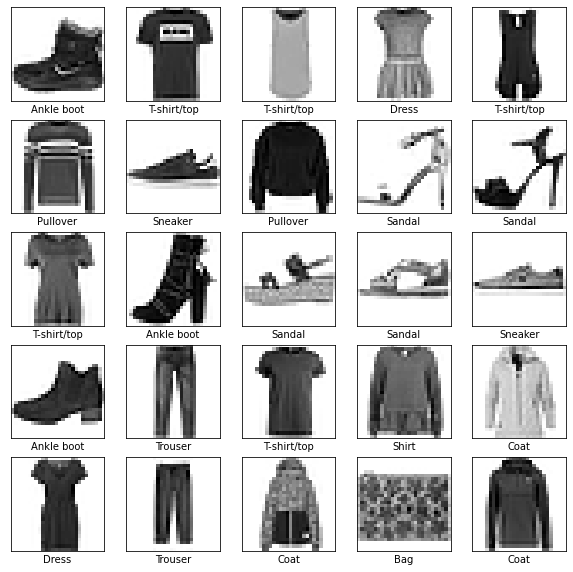

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

#Creamos y entrenamos nuestro modelo inicial de ANN - 128 neuronas en la capa oculta - Función Activación RELU

La primera capa de esta red, tf.keras.layers.Flatten, transforma el formato de las imagenes de un arreglo bi-dimensional (de 28 por 28 pixeles) a un arreglo uni dimensional (de 28*28 pixeles = 784 pixeles). Observe esta capa como una capa no apilada de filas de pixeles en la misma imagen y alineandolo. Esta capa no tiene parametros que aprender; solo reformatea el set de datos.

Despues de que los pixeles estan "aplanados", la secuencia consiste de dos capas tf.keras.layers.Dense. Estas estan densamente conectadas, o completamente conectadas. La primera capa Dense tiene 128 nodos (o neuronas). La segunda (y ultima) capa es una capa de 10 nodos softmax que devuelve un arreglo de 10 probabilidades que suman a 1. Cada nodo contiene una calificacion que indica la probabilidad que la actual imagen pertenece a una de las 10 clases.

In [0]:
#Definimos el modelo... neuronas de cada capa y función de activación para 
model_epochs= keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #Capa de entrada. Son 28 x 28 neuronas. 
    keras.layers.Dense(128, activation='relu'), #1 capa oculta de 128 neuronas. Cada neurona de esta capa tendrá la función de activación RELU. 
    keras.layers.Dense(10, activation='softmax') #Capa de salida con 10 neuronas. Cada neurona de esta capa tendrá la función de activación softmax.
])

Antes de que el modelo esté listo para entrenar, se necesitan algunas configuraciones más. Estas son agregadas durante el paso de compilacion del modelo:

Loss function: Mide qué tan exacto es el modelo durante el entrenamiento. 

Optimizer: Actualiza basado en el set de datos que ve y la funcion de perdida.

Metrics: Se usan para monitorear los pasos de entrenamiento y de pruebas. El siguiente ejemplo usa accuracy (exactitud), la fraccion de la imagenes que son correctamente clasificadas.

In [0]:
#Definición de función de pérdida, optimizador y métricas:
model_epochs.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Ahora si, realizamos el ENTRENAMIENTO. Para esto se requiere de los siguientes pasos:

1) Ingresar los datos de entrenamiento al modelo. En este ejemplo, en el set de datos de entrenamiento se encuentra distribuído 
en los arreglos train_images y train_labels.

2) El modelo aprende a asociar imagenes y etiquetas.

3) Se comprueba al modelo para que haga predicciones sobre un set de datos que se encuentran en el ejemplo, incluído en el arreglo test_images. Verificar que las predicciones sean iguales a las etiquetas de el arreglotest_labels.

Para comenzar a entrenar, llamar al método model.fit (se llama así por que ajusta el modelo a el set de datos de entrenamiento)

In [0]:
#Entrenamiento:
mymodel=model_epochs.fit(train_images, train_labels, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 3.2683 - accuracy: 0.6763
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6896 - accuracy: 0.7415
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5938 - accuracy: 0.7856
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5577 - accuracy: 0.8044
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5154 - accuracy: 0.8208
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5033 - accuracy: 0.8271
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5080 - accuracy: 0.8219
Epoch 8/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4702 - accuracy: 0.8379
Epoch 9/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4666 - accuracy: 0.8399
Epoch 10/100
1875/1875 [==============================] - 3s 2ms/step - l

In [0]:
historial_accuracy=mymodel.history['accuracy']
historial_loss=mymodel.history['loss']
min(historial_loss[0:100])

0.39805227518081665

#Punto A:
Analizar cómo varía la Función de Pérdida de acuerdo a la cantidad iteraciones (epochs)

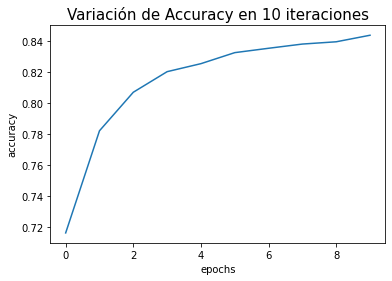

In [0]:
import matplotlib.pyplot as plt

#Cada vez que iteramos disminiuimos el loss y aumentamos nuestro accuracy.

#Historial para epoch=10:
plt.plot(historial_accuracy[0:10])
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.title("Variación de Accuracy en 10 iteraciones", fontsize=15)
plt.show()

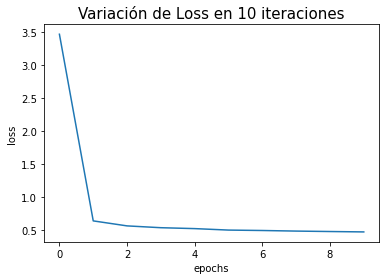

In [0]:
plt.plot(historial_loss[0:10])
plt.ylabel('loss')
plt.xlabel('epochs')
plt.title("Variación de Loss en 10 iteraciones", fontsize=15)
plt.show()

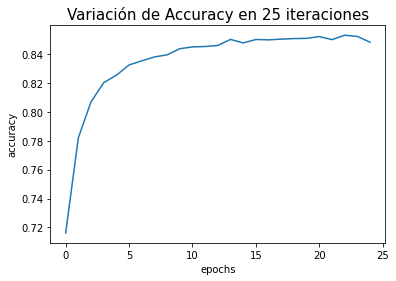

In [0]:
#Historial para epoch=25:
plt.plot(historial_accuracy[0:25])
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.title("Variación de Accuracy en 25 iteraciones", fontsize=15)
plt.show()

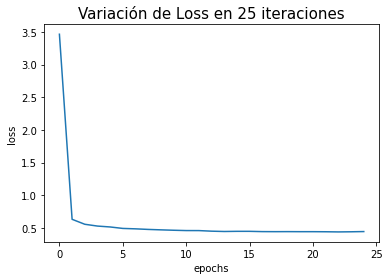

In [0]:
plt.plot(historial_loss[0:25])
plt.ylabel('loss')
plt.xlabel('epochs')
plt.title("Variación de Loss en 25 iteraciones", fontsize=15)
plt.show()

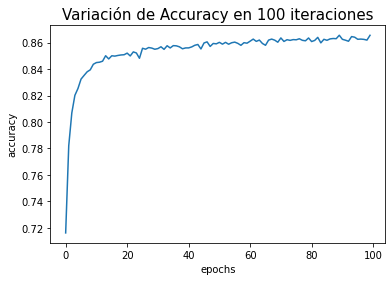

In [0]:
#Historial para epoch=100:
plt.plot(historial_accuracy[0:100])
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.title("Variación de Accuracy en 100 iteraciones", fontsize=15)
plt.show()

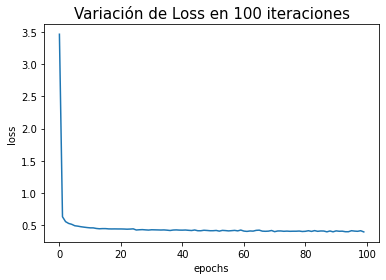

In [0]:
plt.plot(historial_loss[0:100])
plt.ylabel('loss')
plt.xlabel('epochs')
plt.title("Variación de Loss en 100 iteraciones", fontsize=15)
plt.show()

##Observacion Punto A - Loss y Accuracy
A continuación observaremos que a medida que tenemos mayores epochs tendremos menor loss y mayor accuracy:

In [0]:
#Minimo de loss:
print("Loss para los primeros 10 epochs: ",min(historial_loss[0:10]), "en el epoch numero: ", historial_loss[0:10].index(min(historial_loss[0:10])))
print("Loss para los primeros 25 epochs: ",min(historial_loss[0:25]), "en el epoch numero: ", historial_loss[0:25].index(min(historial_loss[0:25])))
print("Loss para los primeros 100 epochs: ",min(historial_loss[0:100]), "en el epoch numero: ", historial_loss[0:100].index(min(historial_loss[0:100])))
min(historial_loss[0:100])


Loss para los primeros 10 epochs:  0.4658707082271576 en el epoch numero:  9
Loss para los primeros 25 epochs:  0.440297394990921 en el epoch numero:  22
Loss para los primeros 100 epochs:  0.39805227518081665 en el epoch numero:  99


0.39805227518081665

In [0]:
#Máximo de Accuracy:
print("Accuracy para los primeros 10 epochs: ",max(historial_accuracy[0:10]), "en el epoch numero: ", historial_accuracy[0:10].index(max(historial_accuracy[0:10])))
print("Accuracy para los primeros 25 epochs: ",max(historial_accuracy[0:25]), "en el epoch numero: ", historial_accuracy[0:25].index(max(historial_accuracy[0:25])))
print("Accuracy para los primeros 100 epochs: ",max(historial_accuracy[0:100]), "en el epoch numero: ", historial_accuracy[0:100].index(max(historial_accuracy[0:100])))
max(historial_accuracy[0:100])

Accuracy para los primeros 10 epochs:  0.8436499834060669 en el epoch numero:  9
Accuracy para los primeros 25 epochs:  0.8529833555221558 en el epoch numero:  22
Accuracy para los primeros 100 epochs:  0.8655666708946228 en el epoch numero:  89


0.8655666708946228

#Punto B:

En base al punto A, estudiar el valor mínimo que devuelve la Función de Pérdida y analizar cómo varía este de acuerdo a la cantidad de neuronas que se adhieren a la capa oculta.

##ANN de 64 neuronas en la capa oculta

In [0]:
#Creamos:
model_epochs_64hidden= keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(64, activation='relu'), 
    keras.layers.Dense(10, activation='softmax') 
])

model_epochs_64hidden.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Entrenamos:
mymodel_64hidden=model_epochs_64hidden.fit(train_images, train_labels, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 3s 2ms/step - loss: 2.8628 - accuracy: 0.6287
Epoch 2/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7787 - accuracy: 0.6947
Epoch 3/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6921 - accuracy: 0.7236
Epoch 4/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6343 - accuracy: 0.7503
Epoch 5/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6339 - accuracy: 0.7499
Epoch 6/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6175 - accuracy: 0.7532
Epoch 7/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6115 - accuracy: 0.7553
Epoch 8/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5978 - accuracy: 0.7595
Epoch 9/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5970 - accuracy: 0.7587
Epoch 10/100
1875/1875 [==============================] - 3s 2ms/step - l

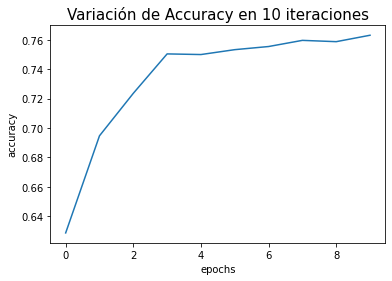

In [0]:
historial_accuracy_64=mymodel_64hidden.history['accuracy']
historial_loss_64=mymodel_64hidden.history['loss']

plt.plot(historial_accuracy_64[0:10])
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.title("Variación de Accuracy en 10 iteraciones", fontsize=15)
plt.show()

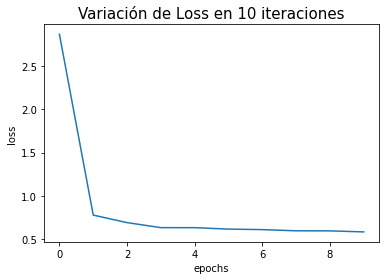

In [0]:
plt.plot(historial_loss_64[0:10])
plt.ylabel('loss')
plt.xlabel('epochs')
plt.title("Variación de Loss en 10 iteraciones", fontsize=15)
plt.show()

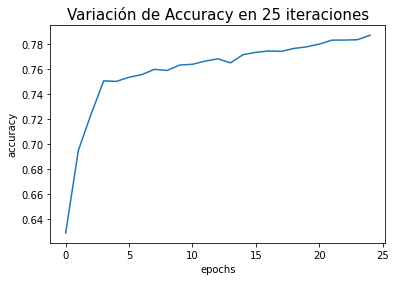

In [0]:
plt.plot(historial_accuracy_64[0:25])
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.title("Variación de Accuracy en 25 iteraciones", fontsize=15)
plt.show()

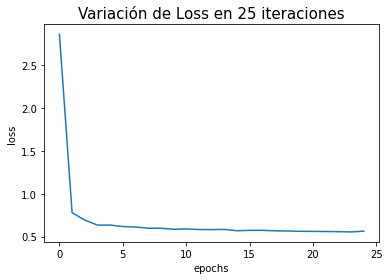

In [0]:
plt.plot(historial_loss_64[0:25])
plt.title("Variación de Loss en 25 iteraciones", fontsize=15)
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

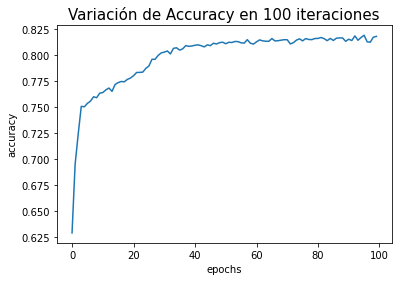

In [0]:
plt.plot(historial_accuracy_64[0:100])
plt.title("Variación de Accuracy en 100 iteraciones", fontsize=15)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.show()

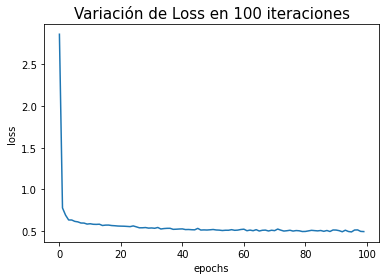

In [0]:
plt.plot(historial_loss_64[0:100])
plt.title("Variación de Loss en 100 iteraciones", fontsize=15)
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

###Loss y Accuracy

In [0]:
#Loss mínimo:
print("Loss para los primeros 10 epochs: ",min(historial_loss_64[0:10]), "en el epoch numero: ", historial_loss_64[0:10].index(min(historial_loss_64[0:10])))
print("Loss para los primeros 25 epochs: ",min(historial_loss_64[0:25]), "en el epoch numero: ", historial_loss_64[0:25].index(min(historial_loss_64[0:25])))
print("Loss para los primeros 100 epochs: ",min(historial_loss_64[0:100]), "en el epoch numero: ", historial_loss_64[0:100].index(min(historial_loss_64[0:100])))

Loss para los primeros 10 epochs:  0.5849815011024475 en el epoch numero:  9
Loss para los primeros 25 epochs:  0.5544013381004333 en el epoch numero:  23
Loss para los primeros 100 epochs:  0.49097883701324463 en el epoch numero:  95


In [0]:
#Máximo Accuracy:
print("Accuracy para los primeros 10 epochs: ",max(historial_accuracy_64[0:10]), "en el epoch numero: ", historial_accuracy_64[0:10].index(max(historial_accuracy_64[0:10])))
print("Accuracy para los primeros 25 epochs: ",max(historial_accuracy_64[0:25]), "en el epoch numero: ", historial_accuracy_64[0:25].index(max(historial_accuracy_64[0:25])))
print("Accuracy para los primeros 100 epochs: ",max(historial_accuracy_64[0:100]), "en el epoch numero: ", historial_accuracy_64[0:100].index(max(historial_accuracy_64[0:100])))

Accuracy para los primeros 10 epochs:  0.7630166411399841 en el epoch numero:  9
Accuracy para los primeros 25 epochs:  0.7868333458900452 en el epoch numero:  24
Accuracy para los primeros 100 epochs:  0.8187000155448914 en el epoch numero:  95


Loss mínimo de 0.49 y Accuracy máximo de 0.81.


##ANN de 256 neuronas en la capa oculta

In [0]:
model_epochs_256hidden= keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'), 
    keras.layers.Dense(10, activation='softmax') 
])
model_epochs_256hidden.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
mymodel_256hidden=model_epochs_256hidden.fit(train_images, train_labels, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 5s 2ms/step - loss: 4.2934 - accuracy: 0.7450
Epoch 2/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5871 - accuracy: 0.7957
Epoch 3/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5310 - accuracy: 0.8158
Epoch 4/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5056 - accuracy: 0.8252
Epoch 5/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4802 - accuracy: 0.8349
Epoch 6/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4730 - accuracy: 0.8372
Epoch 7/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4648 - accuracy: 0.8394
Epoch 8/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4569 - accuracy: 0.8451
Epoch 9/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4610 - accuracy: 0.8424
Epoch 10/100
1875/1875 [==============================] - 5s 2ms/step - l

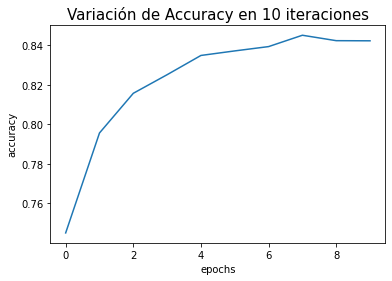

In [0]:
historial_accuracy_256=mymodel_256hidden.history['accuracy']
historial_loss_256=mymodel_256hidden.history['loss']

plt.plot(historial_accuracy_256[0:10])
plt.title("Variación de Accuracy en 10 iteraciones", fontsize=15)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.show()

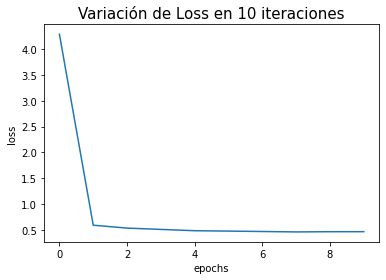

In [0]:
plt.plot(historial_loss_256[0:10])
plt.title("Variación de Loss en 10 iteraciones", fontsize=15)
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

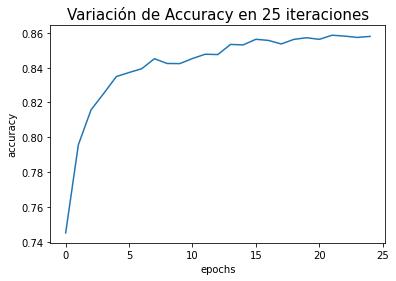

In [0]:
plt.plot(historial_accuracy_256[0:25])
plt.title("Variación de Accuracy en 25 iteraciones", fontsize=15)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.show()

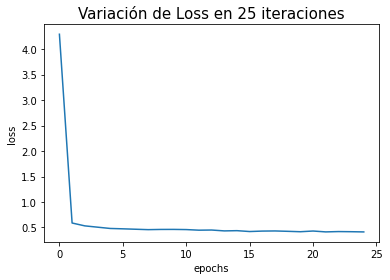

In [0]:
plt.plot(historial_loss_256[0:25])
plt.title("Variación de Loss en 25 iteraciones", fontsize=15)
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

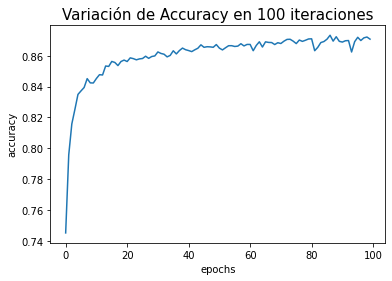

In [0]:
plt.plot(historial_accuracy_256[0:100])
plt.title("Variación de Accuracy en 100 iteraciones", fontsize=15)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.show()

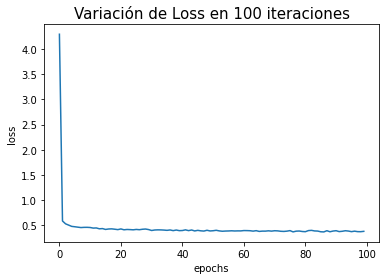

In [0]:
plt.plot(historial_loss_256[0:100])
plt.title("Variación de Loss en 100 iteraciones", fontsize=15)
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

### Loss y Accuracy

In [0]:
#Minimo de loss:
print("Loss para los primeros 10 epochs: ",min(historial_loss_256[0:10]), "en el epoch numero: ", historial_loss_256[0:10].index(min(historial_loss_256[0:10])))
print("Loss para los primeros 25 epochs: ",min(historial_loss_256[0:25]), "en el epoch numero: ", historial_loss_256[0:25].index(min(historial_loss_256[0:25])))
print("Loss para los primeros 100 epochs: ",min(historial_loss_256[0:100]), "en el epoch numero: ", historial_loss_256[0:100].index(min(historial_loss_256[0:100])))

Loss para los primeros 10 epochs:  0.4569009840488434 en el epoch numero:  7
Loss para los primeros 25 epochs:  0.41227057576179504 en el epoch numero:  24
Loss para los primeros 100 epochs:  0.37051641941070557 en el epoch numero:  86


In [0]:
#Máximo de accuracy:
print("Accuracy para los primeros 10 epochs: ",max(historial_accuracy_256[0:10]), "en el epoch numero: ", historial_accuracy_256[0:10].index(max(historial_accuracy_256[0:10])))
print("Accuracy para los primeros 25 epochs: ",max(historial_accuracy_256[0:25]), "en el epoch numero: ", historial_accuracy_256[0:25].index(max(historial_accuracy_256[0:25])))
print("Accuracy para los primeros 100 epochs: ",max(historial_accuracy_256[0:100]), "en el epoch numero: ", historial_accuracy_256[0:100].index(max(historial_accuracy_256[0:100])))

Accuracy para los primeros 10 epochs:  0.8451499938964844 en el epoch numero:  7
Accuracy para los primeros 25 epochs:  0.8586333394050598 en el epoch numero:  21
Accuracy para los primeros 100 epochs:  0.8733166456222534 en el epoch numero:  86


Loss mínimo de 0.37 y Accuracy máximo de 0.87.

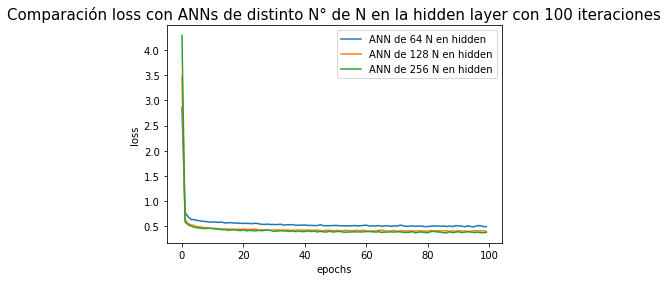

In [0]:
#Comparamos loss en los 3 modelos con distinto número de neuronas en la capa oculta:
plt.plot(historial_loss_64[0:100],label=('ANN de 64 N en hidden'))
plt.plot(historial_loss[0:100], label=('ANN de 128 N en hidden'))
plt.plot(historial_loss_256[0:100],label=('ANN de 256 N en hidden'))
plt.legend()
plt.ylabel('loss')
plt.xlabel('epochs')
plt.title("Comparación loss con ANNs de distinto N° de N en la hidden layer con 100 iteraciones", fontsize=15)
plt.show()

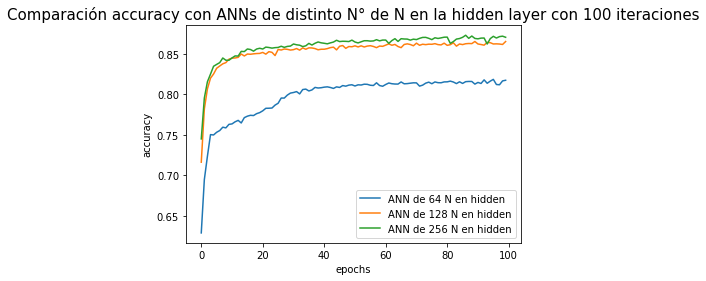

In [0]:
#Comparamos loss en los 3 modelos con distinto número de neuronas en la capa oculta:
plt.plot(historial_accuracy_64[0:100],label=('ANN de 64 N en hidden'))
plt.plot(historial_accuracy[0:100], label=('ANN de 128 N en hidden'))
plt.plot(historial_accuracy_256[0:100],label=('ANN de 256 N en hidden'))
plt.legend()
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.title("Comparación accuracy con ANNs de distinto N° de N en la hidden layer con 100 iteraciones", fontsize=15)
plt.show()

## Observación Punto B- Comparación 3 ANNs
  Viendo los gráficos anteriores concluimos que a mayor número de capas ocultas, nuestro loss será menor y nuestro accuracy mayor. 

#Punto C 
En base al Punto A, estudiar el valor mínimo que devuelve la Función de Pérdida y analizar cómo varía este de acuerdo a la función de activación utilizada.

## ANN 128 neuronas capa oculta - Función Activación Sigmoid

In [0]:
model_sigmoid= keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='sigmoid'), 
    keras.layers.Dense(10, activation='softmax') 
])

model_sigmoid.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

mymodel_sigmoid=model_sigmoid.fit(train_images, train_labels, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.9001 - accuracy: 0.6898
Epoch 2/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7681 - accuracy: 0.7213
Epoch 3/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7183 - accuracy: 0.7286
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7138 - accuracy: 0.7253
Epoch 5/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7222 - accuracy: 0.7316
Epoch 6/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6890 - accuracy: 0.7346
Epoch 7/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6728 - accuracy: 0.7459
Epoch 8/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6681 - accuracy: 0.7474
Epoch 9/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6547 - accuracy: 0.7534
Epoch 10/100
1875/1875 [==============================] - 3s 2ms/step - l

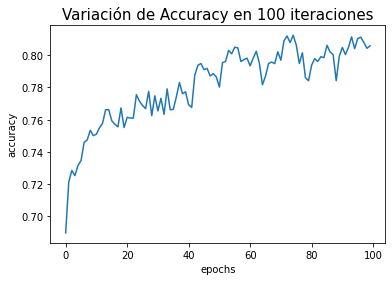

In [0]:
plt.plot(historial_accuracy_sigmoid[0:100])
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.title("Variación de Accuracy en 100 iteraciones", fontsize=15)
plt.show()

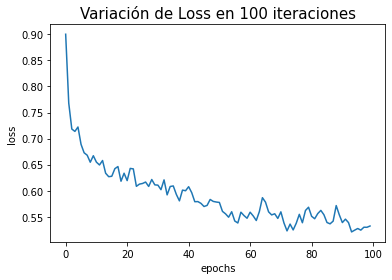

In [0]:
plt.plot(historial_loss_sigmoid[0:100])
plt.ylabel('loss')
plt.xlabel('epochs')
plt.title("Variación de Loss en 100 iteraciones", fontsize=15)
plt.show()

### Loss y Accuracy

In [0]:
#Minimo de Loss:
print("Loss para los primeros 10 epochs: ",min(historial_loss_sigmoid[0:10]), "en el epoch numero: ", historial_loss_sigmoid[0:10].index(min(historial_loss_sigmoid[0:10])))
print("Loss para los primeros 25 epochs: ",min(historial_loss_sigmoid[0:25]), "en el epoch numero: ", historial_loss_sigmoid[0:25].index(min(historial_loss_sigmoid[0:25])))
print("Loss para los primeros 100 epochs: ",min(historial_loss_sigmoid[0:100]), "en el epoch numero: ", historial_loss_sigmoid[0:100].index(min(historial_loss_sigmoid[0:100])))

Loss para los primeros 10 epochs:  0.6546807289123535 en el epoch numero:  8
Loss para los primeros 25 epochs:  0.6084674596786499 en el epoch numero:  23
Loss para los primeros 100 epochs:  0.5210346579551697 en el epoch numero:  93


In [0]:
#Máximo de Accuracy:
print("Accuracy para los primeros 10 epochs: ",max(historial_accuracy_sigmoid[0:10]), "en el epoch numero: ", historial_accuracy_sigmoid[0:10].index(max(historial_accuracy_sigmoid[0:10])))
print("Accuracy para los primeros 25 epochs: ",max(historial_accuracy_sigmoid[0:25]), "en el epoch numero: ", historial_accuracy_sigmoid[0:25].index(max(historial_accuracy_sigmoid[0:25])))
print("Accuracy para los primeros 100 epochs: ",max(historial_accuracy_sigmoid[0:100]), "en el epoch numero: ", historial_accuracy_sigmoid[0:100].index(max(historial_accuracy_sigmoid[0:100])))

Accuracy para los primeros 10 epochs:  0.753433346748352 en el epoch numero:  8
Accuracy para los primeros 25 epochs:  0.7755333185195923 en el epoch numero:  23
Accuracy para los primeros 100 epochs:  0.8123833537101746 en el epoch numero:  74


## ANN 128 neuronas capa oculta - Función Activación TanH

In [0]:
model_tanh= keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='tanh'), 
    keras.layers.Dense(10, activation='softmax') 
])
model_tanh.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
mymodel_tanh=model_tanh.fit(train_images, train_labels, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0244 - accuracy: 0.6314
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9121 - accuracy: 0.6537
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8349 - accuracy: 0.6850
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8296 - accuracy: 0.6750
Epoch 5/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7926 - accuracy: 0.6856
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8015 - accuracy: 0.6969
Epoch 7/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7749 - accuracy: 0.6962
Epoch 8/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7587 - accuracy: 0.7136
Epoch 9/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7339 - accuracy: 0.7124
Epoch 10/100
1875/1875 [==============================] - 4s 2ms/step - l

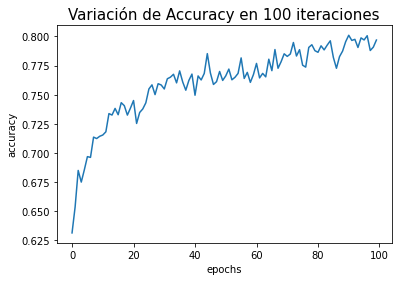

In [0]:
plt.plot(historial_accuracy_tanh[0:100])
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.title("Variación de Accuracy en 100 iteraciones", fontsize=15)
plt.show()

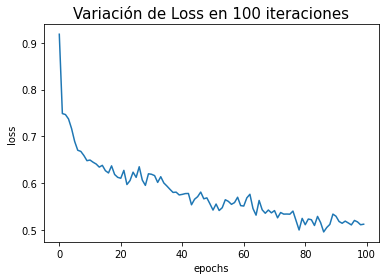

In [0]:

plt.plot(historial_loss_tanh[0:100])
plt.ylabel('loss')
plt.xlabel('epochs')
plt.title("Variación de Loss en 100 iteraciones", fontsize=15)
plt.show()

###Loss y Accuracy

In [0]:
#Minimo de Loss:
print("Loss para los primeros 10 epochs: ",min(historial_loss_tanh[0:10]), "en el epoch numero: ", historial_loss_tanh[0:10].index(min(historial_loss_tanh[0:10])))
print("Loss para los primeros 25 epochs: ",min(historial_loss_tanh[0:25]), "en el epoch numero: ", historial_loss_tanh[0:25].index(min(historial_loss_tanh[0:25])))
print("Loss para los primeros 100 epochs: ",min(historial_loss_tanh[0:100]), "en el epoch numero: ", historial_loss_tanh[0:100].index(min(historial_loss_tanh[0:100])))

Loss para los primeros 10 epochs:  0.7339290976524353 en el epoch numero:  8
Loss para los primeros 25 epochs:  0.6730157136917114 en el epoch numero:  20
Loss para los primeros 100 epochs:  0.5554320216178894 en el epoch numero:  99


In [0]:
#Máximo de Accuracy:
print("Accuracy para los primeros 10 epochs: ",max(historial_accuracy_tanh[0:10]), "en el epoch numero: ", historial_accuracy_tanh[0:10].index(max(historial_accuracy_tanh[0:10])))
print("Accuracy para los primeros 25 epochs: ",max(historial_accuracy_tanh[0:25]), "en el epoch numero: ", historial_accuracy_tanh[0:25].index(max(historial_accuracy_tanh[0:25])))
print("Accuracy para los primeros 100 epochs: ",max(historial_accuracy_tanh[0:100]), "en el epoch numero: ", historial_accuracy_tanh[0:100].index(max(historial_accuracy_tanh[0:100])))

Accuracy para los primeros 10 epochs:  0.7143166661262512 en el epoch numero:  9
Accuracy para los primeros 25 epochs:  0.7450000047683716 en el epoch numero:  20
Accuracy para los primeros 100 epochs:  0.8010166883468628 en el epoch numero:  90


##Comparación Gráfica Loss y Accuracy ANNs con distintas funciones de Activación:

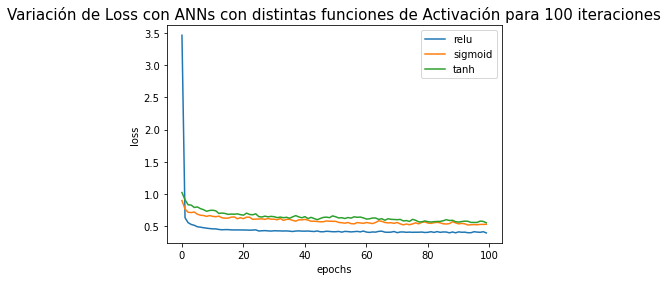

In [0]:
#Vemos el LOSS para cada ANN:
plt.plot(historial_loss[0:100],label=('relu'))
plt.plot(historial_loss_sigmoid[0:100], label=('sigmoid'))
plt.plot(historial_loss_tanh[0:100],label=('tanh'))
plt.ylabel('loss')
plt.xlabel('epochs')
plt.title("Variación de Loss con ANNs con distintas funciones de Activación para 100 iteraciones", fontsize=15)
plt.legend()
plt.show()

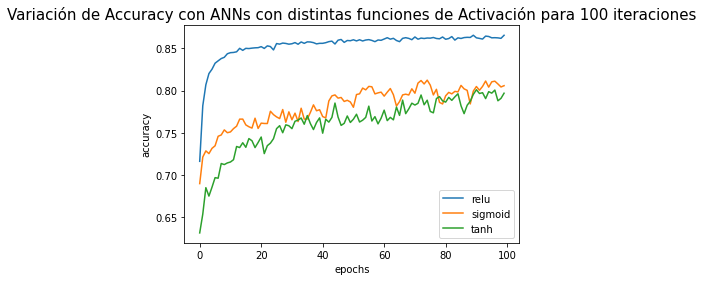

In [0]:
#Vemos el Accuracy para cada ANN:
plt.plot(historial_accuracy[0:100],label=('relu'))
plt.plot(historial_accuracy_sigmoid[0:100], label=('sigmoid'))
plt.plot(historial_accuracy_tanh[0:100],label=('tanh'))
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.title("Variación de Accuracy con ANNs con distintas funciones de Activación para 100 iteraciones", fontsize=15)
plt.legend()
plt.show()

## Observación Punto C

Comparación de los Loss y Accuracy para cada una de las ANNs con 128 neuronas capa oculta en 100 épocas con distintas funciones de activación:


*  ANN Relu:
  *  Loss min: 0.39
  *  Accuracy max: 0.86

*  ANN Sigmoid:
  *  Loss min: 0.52
  *  Accuracy max: 0.81

*  ANN TanH:
  *  Loss min: 0.55
  *  Accuracy max: 0.80


Gráficamente vemos los LOSS para cada una:

Text(0, 0.5, 'LOSS')

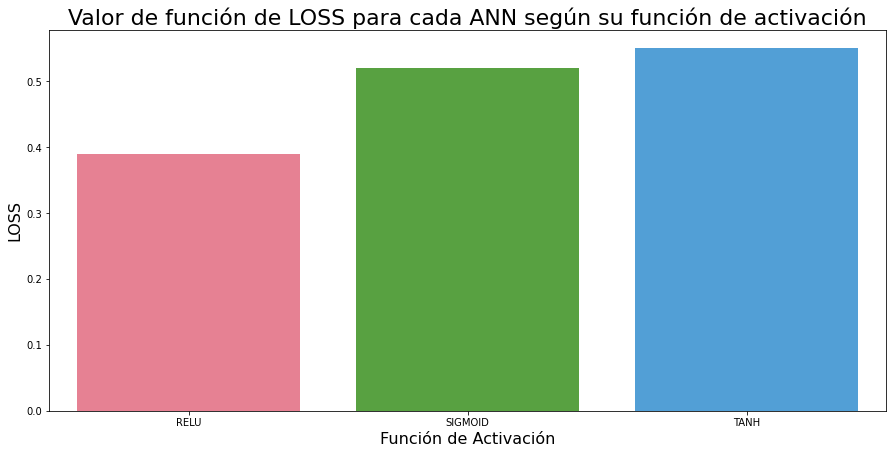

In [0]:
plt.figure(figsize=(15,7))
g = sns.barplot(x= ['RELU','SIGMOID','TANH'], y= [0.39,0.52,0.55], orient='v', palette= 'husl', dodge=False)
g.set_title("Valor de función de LOSS para cada ANN según su función de activación", fontsize=22)
g.set_xlabel("Función de Activación", fontsize=16)
g.set_ylabel("LOSS", fontsize=16)

Ahora vemos gráficamente los ACCURACY para cada una:

Text(0, 0.5, 'ACCURACY')

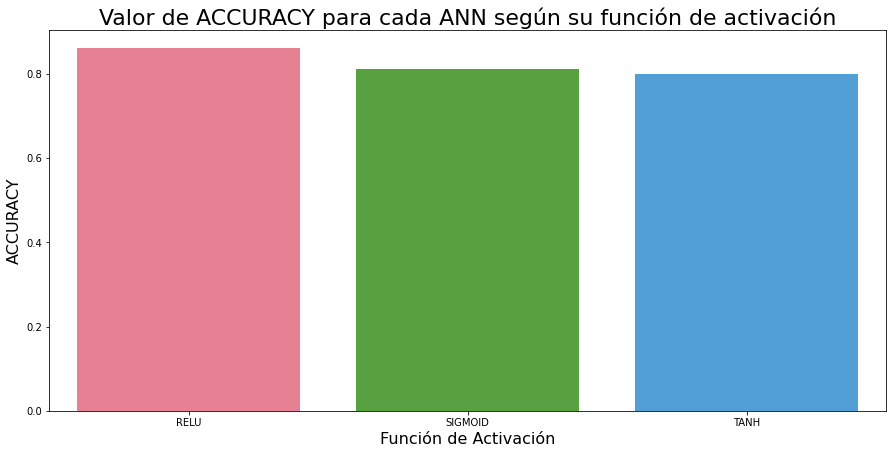

In [0]:
plt.figure(figsize=(15,7))
g = sns.barplot(x= ['RELU','SIGMOID','TANH'], y= [0.86,0.81,0.80], orient='v', palette= 'husl', dodge=False)
g.set_title("Valor de ACCURACY para cada ANN según su función de activación", fontsize=22)
g.set_xlabel("Función de Activación", fontsize=16)
g.set_ylabel("ACCURACY", fontsize=16)

**De esta manera, observamos que utilizando la función de activación RELU obtenemos un mejor performance: logramos el MENOR LOSS y el MAYOR ACCURACY.**

# Predicciones.

In [0]:
#Se realiza las predicciones de las imagenes de prueba para un modelo de 128 neuronas 
predictions = model_epochs.predict(test_images)

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

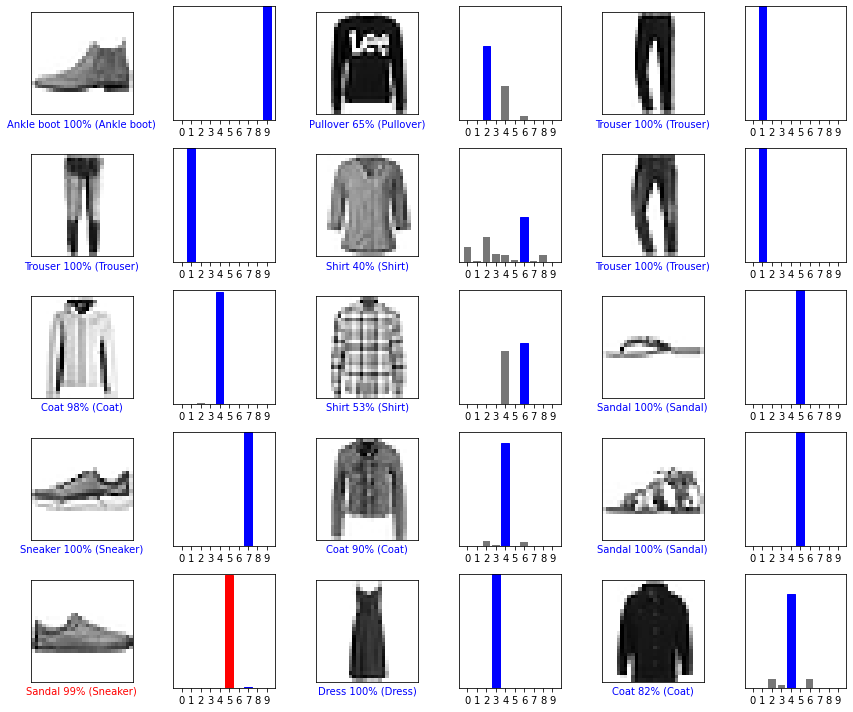

In [0]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()